## Brute Force Tag Recommendation Weighted Graph and Word Embeddings (Skip-Gram model)



In [1]:
import requests
import csv

In [2]:
#Sample Query from given web addess
url='https://api.stackexchange.com/2.2/questions?page=1&pagesize=100&order=desc&sort=activity&site=datascience'
data=requests.get(url).json()
data

{'items': [{'tags': ['machine-learning',
    'deep-learning',
    'keras',
    'dataset',
    'alex-net'],
   'owner': {'reputation': 21,
    'user_id': 109081,
    'user_type': 'unregistered',
    'profile_image': 'https://www.gravatar.com/avatar/03a64e6f38912c6ca8580fd519f990b6?s=256&d=identicon&r=PG',
    'display_name': 'CrocusMac',
    'link': 'https://datascience.stackexchange.com/users/109081/crocusmac'},
   'is_answered': False,
   'view_count': 3599,
   'answer_count': 1,
   'score': 2,
   'last_activity_date': 1681488095,
   'creation_date': 1608314376,
   'question_id': 86881,
   'content_license': 'CC BY-SA 4.0',
   'link': 'https://datascience.stackexchange.com/questions/86881/how-to-resize-mnist-images-to-fit-alexnet-model',
   'title': 'How to resize MNIST images to fit AlexNet model'},
  {'tags': ['machine-learning', 'clustering'],
   'owner': {'reputation': 1,
    'user_id': 148976,
    'user_type': 'registered',
    'profile_image': 'https://lh5.googleusercontent.com/

#### As we see our area of interest is in 'tags' object containing list of tags.

In [3]:
data['items'][0]['tags'] #Way to is used to access a specific piece of information from a JSON file that has been loaded into a Python object, such as a dictionary or a list.

['machine-learning', 'deep-learning', 'keras', 'dataset', 'alex-net']

### PipeLine
1. Get url content thorugh requests package
2. extract json object from given url and look for 'tags' using something like this : data['items'][0]['tags']
3. query the tags from atleast 100 pages (10000 words approx.) and store it in txt file
4. read txt file with each row representing one 'tag' and its terms.
5. preprocess tags so that it can be further easily processed like word_to_int and int_to_word
6. create weighted graph from the given tags using networkx
7. top sample few related words when an input tag is given
8. Compare the results with word embeddings Skip-gram model

In [4]:
def get_data(pages,url):
    '''
    description : get json content from given url and number of pages and return terms present in 'tags'
                 object.
    
    Argument : int pages, string url
    
    return : tags
    '''
    x=[]
    for i in range(1,pages+1):
        url='https://api.stackexchange.com/2.2/questions?page='+str(i)+'&pagesize=100&order=desc&sort=activity&site=datascience'
        data=requests.get(url).json()   #request url content in json
        for v in (data['items']):
            x.append(v['tags'])         #store tags
            
    return x

def store_tokens(file_name,url,pages):
    '''
    description : writing and saving tags extracted from url json in txt file.
    
    Argument : string file_name , string url, int pages
    
    return : None
    '''
    x=get_data(pages,url)
    with open(file_name,'w') as file:
        for i in (x):
            for j in i:
                file.write(j+',')
            file.write('\n')

pages=150
url='https://api.stackexchange.com/2.2/questions?page='+'1'+'&pagesize=100&order=desc&sort=activity&site=datascience'
file_name='tags.txt'

store_tokens(file_name,url,pages) #Store the tags in tags.txt with 150 pages of query
        
        

KeyError: 'items'

In [ ]:
from collections import Counter

#Read tags.txt file containig tags on eachrow from each page
with open("webapp/Data/tags.txt","r") as f:
    t2=f.read()
    
def tag_dict(text):
    '''
    description : convert raw tags per row from json to integer corrosponding each tags from the whole file.
    
    Argument : string text
    
    return : dictionary of tags to integer dic
    '''
    
    #preprocess text
    text=text.lower()
    text=text.split('\n')
    dic={}
    
    #store each tag as a unique integer to represent
    for i,v in enumerate(text):
        v=v.split(',')
        dic[i]=v
        del dic[i][len(dic[i])-1]
    return dic

def tag_to_int(data):
    '''
    description : word to integer method that returns dictionary of word to int used for enique tags to int.
    
    Argument : string text
    
    return : dictionary of tag to int
    '''
    word_int={}
    for i,v in enumerate(data):
        word_int[v]=i
    return word_int

def unique_tags(text):
    '''
    description : get tags and return unique list of tags.
    
    Argument : string text
    
    return : list tags
    '''
    text=text.split('\n')
    tags=list(set(''.join(text).split(',')))
    tags=sorted(tags)
    del tags[0]
    return tags

def int_to_tags(int_tag):
    '''
    description : input integer representation of tag and return its string form.
    
    Argument : int tags
    
    return : dictionary of int o tags
    '''
    return {v:k for k,v in list(int_tag.items())}


In [ ]:
tag_unique=unique_tags(t2)
int_tag=tag_to_int(tag_unique)
tags_dictionary=tag_dict(t2)
int_to_tag=int_to_tags(int_tag)
tag_unique

In [ ]:
int_tag

In [9]:
tags_dictionary

{0: ['python', 'error-handling', 'web-scraping'],
 1: ['machine-learning',
  'python',
  'dataset',
  'pandas',
  'machine-learning-model'],
 2: ['machine-learning', 'python', 'deep-learning', 'keras', 'tensorflow'],
 3: ['machine-learning', 'xgboost'],
 4: ['python', 'neural-network', 'scikit-learn', 'mlp'],
 5: ['machine-learning',
  'neural-network',
  'deep-learning',
  'nlp',
  'natural-language-process'],
 6: ['machine-learning', 'classification', 'random-forest'],
 7: ['clustering', 'pca'],
 8: ['machine-learning', 'neural-network', 'gradient-descent'],
 9: ['linear-regression', 'encoding', 'stata'],
 10: ['machine-learning', 'orange', 'plotting'],
 11: ['machine-learning',
  'regression',
  'clustering',
  'statistics',
  'density-estimation'],
 12: ['machine-learning', 'python', 'numpy', 'matplotlib'],
 13: ['neural-network', 'gradient-descent', 'backpropagation'],
 14: ['python',
  'classification',
  'categorical-data',
  'dimensionality-reduction'],
 15: ['regression', 'los

In [10]:
int_to_tag

{0: '.net',
 1: '3d-object-detection',
 2: '3d-reconstruction',
 3: 'ab-test',
 4: 'accuracy',
 5: 'activation-function',
 6: 'active-learning',
 7: 'activity-recognition',
 8: 'actor-critic',
 9: 'adaboost',
 10: 'aggregation',
 11: 'ai',
 12: 'alex-net',
 13: 'algorithms',
 14: 'allennlp',
 15: 'amazon-ml',
 16: 'anaconda',
 17: 'ann',
 18: 'annotation',
 19: 'anomaly',
 20: 'anomaly-detection',
 21: 'anonymization',
 22: 'anova',
 23: 'apache-hadoop',
 24: 'apache-spark',
 25: 'api',
 26: 'arima',
 27: 'arrow',
 28: 'association-rules',
 29: 'attention-mechanism',
 30: 'auc',
 31: 'audio-recognition',
 32: 'autoencoder',
 33: 'autoencodere',
 34: 'automatic-summarization',
 35: 'automation',
 36: 'automl',
 37: 'aws',
 38: 'aws-lambda',
 39: 'azure-ml',
 40: 'backbone-network',
 41: 'backpropagation',
 42: 'bag-of-words',
 43: 'bagging',
 44: 'bart',
 45: 'batch-normalization',
 46: 'bayes-error',
 47: 'bayesian',
 48: 'bayesian-networks',
 49: 'bayesian-nonparametric',
 50: 'beginn

#### Now lets create weighted graphs out of the tags from text file. 
#### Each row of text file has some set of terms like 'machine-learning','python' etc. extract these words and construct weighted graph of relations 

In [11]:
import networkx as nx
from itertools import combinations
#1 : K-Means, 2 : clustering, 3 : Python, 4 : ML, 5 : Neural, 6: Keras
#weights=dict.fromkeys(range(1,7),0)

def createRelations(tags_dictionary):
    '''
    description :  input dictionary of tags from text file  and output the graph with weighted edges
    Argument : dictionary of tags from text file
    
    return : graph object with all weighted edges and nodes
    '''
    G=nx.Graph()
    for row in tags_dictionary:
        for j in range(len(tags_dictionary[row])):
            tags_dictionary[row][j]=int_tag[tags_dictionary[row][j]]
        x=list(combinations(tags_dictionary[row],2))
        for n1,n2 in x:
            if G.has_edge(n1,n2):
                G[n1][n2]["weight"]+=1
            else:
                G.add_edge(n1,n2,weight=1)
    return G

In [11]:
import matplotlib.pyplot as plt
def visualize(G):
    pos=nx.nx_agraph.graphviz_layout(G) # pos = nx.nx_agraph.graphviz_layout(G)
    nx.draw_networkx(G,pos)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels);
    nx.draw(G,pos,node_size=60,font_size=8) 
    plt.figure(figsize=(12,12)) 
    nx.draw(G,pos)
    plt.show()

In [12]:
relations=createRelations(tags_dictionary)


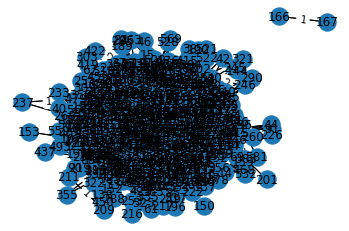

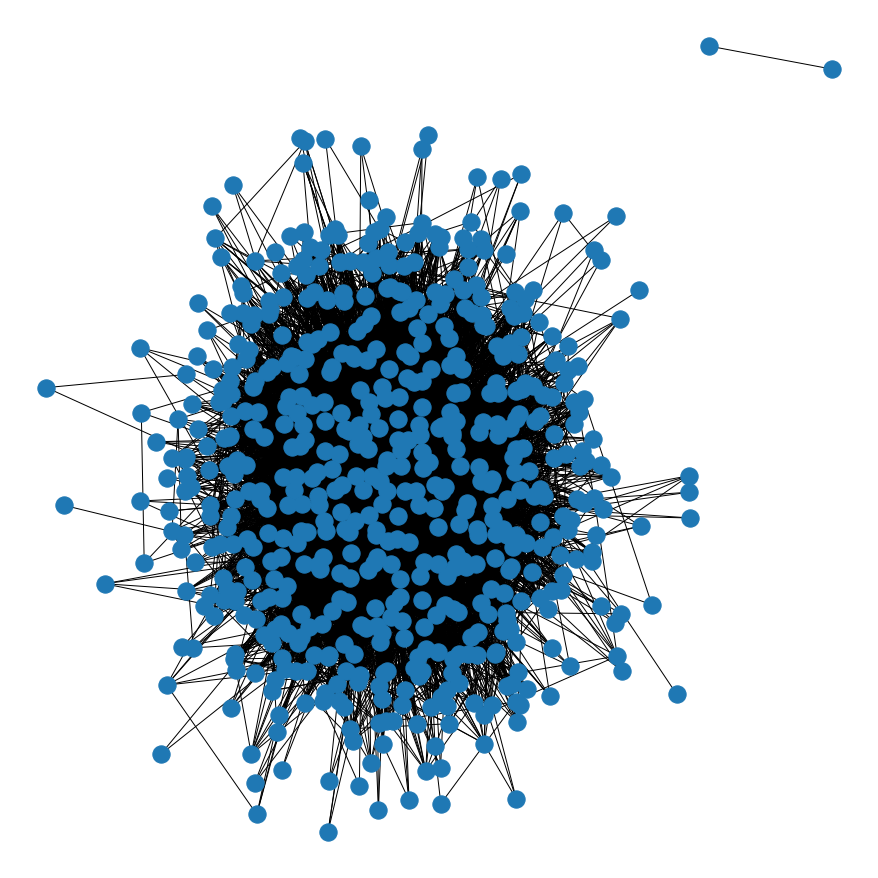

In [13]:
visualize(relations)

In [14]:
import math
nx.write_gpickle(relations, "graph.gpickle")

In [24]:
import math
def query(search_term,relations,topk=0.3):
    '''
    description : input search term, graph of tags and topk or the top confidence or related terms to get 
                    as output.
    
    Argument : string search term, onject graph, int topk
    
    return : list (predicted words and int weights)
    '''
    #convert search term string to int.
    try:
        current=int_tag[search_term]
    except:
        return " "
    
    # Search for neighbours of search term
    similar=list(relations.neighbors(current))
    
    nodes_similar=[]
    for i in similar:
        nodes_similar.append((i,relations.get_edge_data(current,i)['weight']))
    
    #sort tags according to their edges weight, highest weight is first placed
    nodes_similar.sort(key=lambda x:x[1],reverse=True)
    
    nodes_similar_descent=[]
    #Extrack topk words from sorted of similar words for prediction of search term
    for i in range(math.ceil(topk*len(nodes_similar))):
        
        nodes_similar_descent.append((nodes_similar[i][0],nodes_similar[i][1]))
    predict_terms=[]
    
    for i in nodes_similar_descent:
        predict_terms.append((int_to_tag[i[0]],i[1]))
    
    return predict_terms
    

In [25]:
g=nx.read_gpickle("webapp/Data/graph.gpickle")


### Query Search results

@ 4% topk sample

In [31]:
word="gradient descent"
word=word.lower()
if " " in word:
    word=word.replace(" ","-")

In [32]:
query(word,g,0.04)

[('machine-learning', 65),
 ('neural-network', 47),
 ('optimization', 31),
 ('backpropagation', 25),
 ('deep-learning', 21)]

In [21]:
query("xgboost",relations,0.04)

[('machine-learning', 116),
 ('python', 62),
 ('classification', 43),
 ('decision-trees', 32),
 ('regression', 31),
 ('random-forest', 25)]

In [22]:
query("overfitting",relations,0.04)

[('machine-learning', 40),
 ('neural-network', 26),
 ('deep-learning', 24),
 ('cross-validation', 21),
 ('cnn', 17)]

In [23]:
query("bayesian",relations,0.04)

[('machine-learning', 9), ('statistics', 9), ('bayesian-networks', 7)]

### Word Embeddings

In [20]:
import utils
# read in the extracted text file      
with open('test.txt') as f:
    text = f.read()

# print out the first 100 characters
# get list of words
words = utils.preprocess(text)
print(words[:30])

['machine-learning', 'time-series', 'cross-validation', 'python', 'probability', 'dataset', 'information-retrieval', 'gradient-descent', 'machine-learning', 'data-analysis', 'image-preprocessing', 'social-network-analysis', 'mathematics', 'python', 'nlp', 'natural-language-process', 'named-entity-recognition', 'spacy', 'machine-learning', 'regression', 'azure-ml', 'chi-square-test', 'text-mining', 'pattern-recognition', 'grammar-inference', 'neural-network', 'graph-neural-network', 'math', 'mathematics', 'adaboost']


In [46]:
vocab_to_int, int_to_vocab = utils.create_lookup_tables(words)
int_words = [vocab_to_int[word] for word in words]

print(int_words[:30])
len(vocab_to_int)

[0, 9, 30, 1, 69, 14, 147, 49, 0, 82, 90, 213, 142, 1, 8, 52, 116, 180, 0, 11, 220, 387, 47, 299, 547, 3, 352, 122, 142, 310]


589

In [47]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
from collections import Counter
import random
import numpy as np

def get_target(words, idx, window_size=5):
    ''' Get a list of words in a window around an index. '''
    
    R = np.random.randint(1, window_size+1)
    start = idx - R if (idx - R) > 0 else 0
    stop = idx + R
    target_words = words[start:idx] + words[idx+1:stop+1]
    
    return list(target_words)

# check for random window selection
int_text = [i for i in range(10)]
print('Input: ', int_text)
idx=5 # word index of interest

target = get_target(int_text, idx=idx, window_size=5)
print('Target: ', target)  


Input:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Target:  [2, 3, 4, 6, 7, 8]


In [48]:
def get_batches(words, batch_size, window_size=5):
    ''' Create a generator of word batches as a tuple (inputs, targets) '''
    
    n_batches = len(words)//batch_size
    
    # only full batches
    words = words[:n_batches*batch_size]
    
    for idx in range(0, len(words), batch_size):
        x, y = [], []
        batch = words[idx:idx+batch_size]
        for ii in range(len(batch)):
            batch_x = batch[ii]
            batch_y = get_target(batch, ii, window_size)
            y.extend(batch_y)
            x.extend([batch_x]*len(batch_y))
        yield x, y
    

In [49]:
int_text = [i for i in range(20)]
x,y = next(get_batches(int_text, batch_size=5, window_size=6))

print('x\n', x)
print('y\n', y)

x
 [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4]
y
 [1, 2, 3, 4, 0, 2, 3, 4, 0, 1, 3, 4, 0, 1, 2, 4, 3]


In [50]:
import random
def cosine_similarity(embedding, valid_size=64, valid_window=100, device='cpu'):
    """ Returns the cosine similarity of validation words with words in the embedding matrix.
        Here, embedding should be a PyTorch embedding module.
    """
    
    # sim = (a . b) / |a||b|
    
    embed_vectors = embedding.weight
    
    # magnitude of embedding vectors, |b|
    magnitudes = embed_vectors.pow(2).sum(dim=1).sqrt().unsqueeze(0)
    
    # pick N words from our ranges (0,window) and (1000,1000+window). lower id implies more frequent 
    valid_examples = np.array(random.sample(range(valid_window), valid_size//2))
    valid_examples = np.append(valid_examples,
                               random.sample(range(100,300+valid_window), valid_size//2))
    valid_examples = torch.LongTensor(valid_examples).to(device)
    
    valid_vectors = embedding(valid_examples)
    similarities = torch.mm(valid_vectors, embed_vectors.t())/magnitudes
        
    return valid_examples, similarities

In [51]:
import torch
from torch import nn
import torch.optim as optim

In [52]:
torch.cuda.is_available()

False

In [53]:
class SkipGram(nn.Module):
    def __init__(self, n_vocab, n_embed):
        super().__init__()
        
        self.embed = nn.Embedding(n_vocab, n_embed)
        self.output = nn.Linear(n_embed, n_vocab)
        self.log_softmax = nn.LogSoftmax(dim=1)
    
    def forward(self, x):
        x = self.embed(x)
        scores = self.output(x)
        log_ps = self.log_softmax(scores)
        
        return log_ps

In [54]:

# check if GPU is available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(torch.cuda.is_available())
embedding_dim=300 # you can change, if you want

model = SkipGram(len(vocab_to_int), embedding_dim).to(device)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

print_every = 500
steps = 0
epochs = 50

# train for some number of epochs
for e in range(epochs):
    
    # get input and target batches
    for inputs, targets in get_batches(int_words, 256):
        steps += 1
        inputs, targets = torch.LongTensor(inputs), torch.LongTensor(targets)
        inputs, targets = inputs.to(device), targets.to(device)
        
        log_ps = model(inputs)
        loss = criterion(log_ps, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if steps % print_every == 0:                  
            # getting examples and similarities      
            valid_examples, valid_similarities = cosine_similarity(model.embed, device=device)
            _, closest_idxs = valid_similarities.topk(6) # topk highest similarities
            
            valid_examples, closest_idxs = valid_examples.to('cpu'), closest_idxs.to('cpu')
            for ii, valid_idx in enumerate(valid_examples):
                closest_words = [int_to_vocab[idx.item()] for idx in closest_idxs[ii]][1:]
                print(int_to_vocab[valid_idx.item()] + " ----> " + ', '.join(closest_words))
            print("...")

False
categorical-data ----> metadata, difference, binary, <PERIOD>, numpy
class-imbalance ----> classifier, redshift, doc2vec, supervised-learning, mongodb
k-means ----> distance, education, apache-spark, allennlp, distribution
backpropagation ----> feature-extraction, speech-to-text, gridsearchcv, deepmind, convnet
feature-scaling ----> data-product, softmax, pickle, orange3, features
optimization ----> communication, sensors, ensemble-learning, overfitting, probability
numpy ----> convolution, unsupervised-learning, image-preprocessing, orange3, definitions
clustering ----> anomaly, monte-carlo, error-handling, dimensionality-reduction, ensemble-learning
regression ----> rbm, bias, language-model, arrow, google-cloud
gradient-descent ----> probability-calibration, scalability, learning, unsupervised-learning, deep-network
decision-trees ----> nlp, variance, cs231n, activation-function, shap
lstm ----> databases, data-mining, game, map-reduce, neural
orange ----> market-basket-analys

reinforcement-learning ----> matrix, sagemaker, python-3, math, shap
metric ----> computer-vision, knowledge-graph, software-recommendation, score, discriminant-analysis
unsupervised-learning ----> k-nn, apache-hadoop, object-recognition, nlg, numpy
embeddings ----> or-tools, similar-documents, ann, text, matrix
hyperparameter-tuning ----> lsi, smotenc, software-development, genetic-algorithms, rbf
gradient-descent ----> unsupervised-learning, learning, scalability, probability-calibration, language-model
numpy ----> orange3, convolution, unsupervised-learning, image-preprocessing, definitions
time-series ----> metaheuristics, data-indexing-techniques, classifier, ensemble-modeling, variance
neural-network ----> genetic, object-recognition, competitions, cost-function, glm
clustering ----> anomaly, monte-carlo, error-handling, rbf, svr
keras ----> neo4j, softmax, amazon-ml, estimation, tflearn
cnn ----> inceptionresnetv2, machine-learning-model, context-vector, multitask-learning, stem

cross-validation ----> spectral-clustering, spss, pandas, graph-neural-network, image-size
algorithms ----> weighted-data, ml, open-source, object-recognition, esl
graphs ----> inceptionresnetv2, powerbi, crisp-dm, data-cleaning, predictor-importance
prediction ----> distance, categorical-encoding, state-of-the-art, hyperparameter, survival-analysis
autoencoder ----> classifier, learning-to-rank, predict, spearmans-rank-correlation, sagemaker
r ----> marketing, coursera, dirichlet, sensors, predict
categorical-data ----> metadata, binary, numpy, unseen-data, difference
accuracy ----> predictive-modeling, smote, networkx, hypothesis-testing, ann
metric ----> computer-vision, software-recommendation, knowledge-graph, score, discriminant-analysis
x ----> mlflow, pgm, natural-language-process, manhattan, algorithms
predictive-modeling ----> accuracy, one-shot-learning, game, sparse, or-tools
time-series ----> data-indexing-techniques, classifier, metaheuristics, ensemble-modeling, google
<

decision-trees ----> nlp, cs231n, autoencodere, shap, activation-function
lstm ----> databases, permutation-test, game, neural, historgram
gpu ----> vector-space-models, natural-language-process, neural-network, isolation-forest, association-rules
<PERIOD> ----> mean-shift, shap, metadata, anonymization, dplyr
convolution ----> numpy, javascript, image, aws-lambda, image-preprocessing
outlier ----> encoding, similarity, caffe, arrow, jupyter
overfitting ----> q-learning, descriptive-statistics, counts, annotation, optimization
forecasting ----> dataframe, lsi, azure-ml, data-wrangling, noisification
statistics ----> esl, processing, kaggle, monte-carlo, hardware
feature-scaling ----> softmax, features, pickle, orange3, data-product
keras ----> neo4j, amazon-ml, estimation, tflearn, skorch
natural-language-process ----> math, x, data-mining, infographics, gpu
data-analysis ----> gridsearchcv, data-indexing-techniques, dummy-variables, coursera, spyder
unbalanced-classes ----> siamese-ne

data-analysis ----> data-indexing-techniques, gridsearchcv, dummy-variables, coursera, spyder
orange ----> market-basket-analysis, convolution, classifier, dimensionality-reduction, data-product
decision-trees ----> nlp, cs231n, autoencodere, shap, finetuning
text-mining ----> naive-bayes-algorithim, openai-gpt, linux, unbalanced-classes, multilabel-classification
numpy ----> convolution, orange3, unsupervised-learning, image-preprocessing, definitions
logistic-regression ----> anaconda, research, confusion-matrix, sports, allennlp
convnet ----> word, actor-critic, redshift, learning-rate, estimators
data ----> non-parametric, keras-rl, communication, correlation, neural-style-transfer
similarity ----> bag-of-words, lda, pattern-recognition, outlier, ml
transformer ----> hinge-loss, allennlp, history, h2o, pip
feature-extraction ----> backpropagation, backbone-network, latex, historgram, weighted-data
image-recognition ----> grammar-inference, classification, tpu, automl, simulation
da

transfer-learning ----> kerastuner, stemming, groupby, structured-data, spearmans-rank-correlation
anomaly-detection ----> object-detection, isolation-forest, python-3, seaborn, feature-reduction
natural-language-process ----> math, x, data-mining, infographics, classifier
predictive-modeling ----> one-shot-learning, accuracy, game, sparse, distribution
optimization ----> communication, overfitting, ensemble-learning, image-size, machine-learning
feature-extraction ----> backpropagation, backbone-network, latex, historgram, weighted-data
nlp ----> decision-trees, rstudio, generalization, hashing-trick, discounted-reward
numpy ----> orange3, convolution, unsupervised-learning, image-preprocessing, consumerweb
supervised-learning ----> ngrams, binary, boosting, class-imbalance, learning
r ----> marketing, predict, dirichlet, coursera, pooling
bigdata ----> web-scraping, knime, encoding, aggregation, nltk
recommender-system ----> keras-rl, multiclass-classification, map-reduce, ndcg, know

x ----> mlflow, pgm, natural-language-process, manhattan, keras
feature-extraction ----> backpropagation, backbone-network, historgram, latex, processing
overfitting ----> counts, dataset, bioinformatics, descriptive-statistics, q-learning
data-science-model ----> competitions, parsing, early-stopping, active-learning, time
orange ----> convolution, market-basket-analysis, stanford-nlp, classifier, dimensionality-reduction
image-classification ----> neural-style-transfer, audio-recognition, machine-learning, huggingface, jaccard-coefficient
gan ----> probabilistic-programming, galago, version-control, rdkit, pickle
evaluation ----> feature-selection, error-handling, gaussian-process, estimation-updating, gluon
dataset ----> graphical-model, anova, sports, infographics, tesseract
transformer ----> hinge-loss, allennlp, history, h2o, scala
time-series ----> data-indexing-techniques, classifier, metaheuristics, ensemble-modeling, error-handling
accuracy ----> smote, predictive-modeling, h

neural-network ----> genetic, object-recognition, algorithms, cost-function, manifold
pytorch ----> latex, powerbi, error-handling, pruning, community
regression ----> rbm, finite-precision, bias, sports, openai-gpt
accuracy ----> smote, hypothesis-testing, predictive-modeling, distance, networkx
algorithms ----> open-source, object-recognition, weighted-data, ml, neural-network
object-detection ----> anomaly-detection, project-planning, pac-learning, sagemaker, markov-hidden-model
bigdata ----> web-scraping, encoding, knime, project-planning, aggregation
feature-extraction ----> backpropagation, backbone-network, latex, historgram, encoder
normalization ----> groundtruth, roc, objective-function, net, feature-map
rnn ----> stab, tableau, target-encoding, mlflow, notation
random-forest ----> nl2sql, ml, ridge-regression, learning, math
overfitting ----> counts, dataset, bioinformatics, q-learning, descriptive-statistics
multilabel-classification ----> vc-theory, neural-style-transfer, 

reinforcement-learning ----> sagemaker, python-3, math, pandas, distribution
image-recognition ----> grammar-inference, classification, pytorch, gradient-descent, tpu
image-preprocessing ----> networkx, convolution, notation, least-squares-svm, windows
forecasting ----> lsi, data-wrangling, elastic-net, cross-validation, dataframe
word-embeddings ----> cart, arima, dimensionality-reduction, dropout, finetuning
normalization ----> groundtruth, roc, objective-function, net, feature-map
data-analysis ----> data-indexing-techniques, coursera, gridsearchcv, least-squares-svm, interpolation
bigdata ----> encoding, web-scraping, knime, project-planning, aggregation
numpy ----> convolution, orange3, unsupervised-learning, gluon, field-aware-factorization-machines
feature-scaling ----> softmax, features, pickle, orange3, data-product
graphs ----> predictor-importance, association-rules, inceptionresnetv2, arrow, powerbi
regression ----> rbm, finite-precision, bias, sports, machine-learning-mode

In [55]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
# getting embeddings from the embedding layer of our model, by name
embeddings = model.embed.weight.to('cpu').data.numpy()

viz_words = 431
tsne = TSNE()
embed_tsne = tsne.fit_transform(embeddings[:viz_words, :])

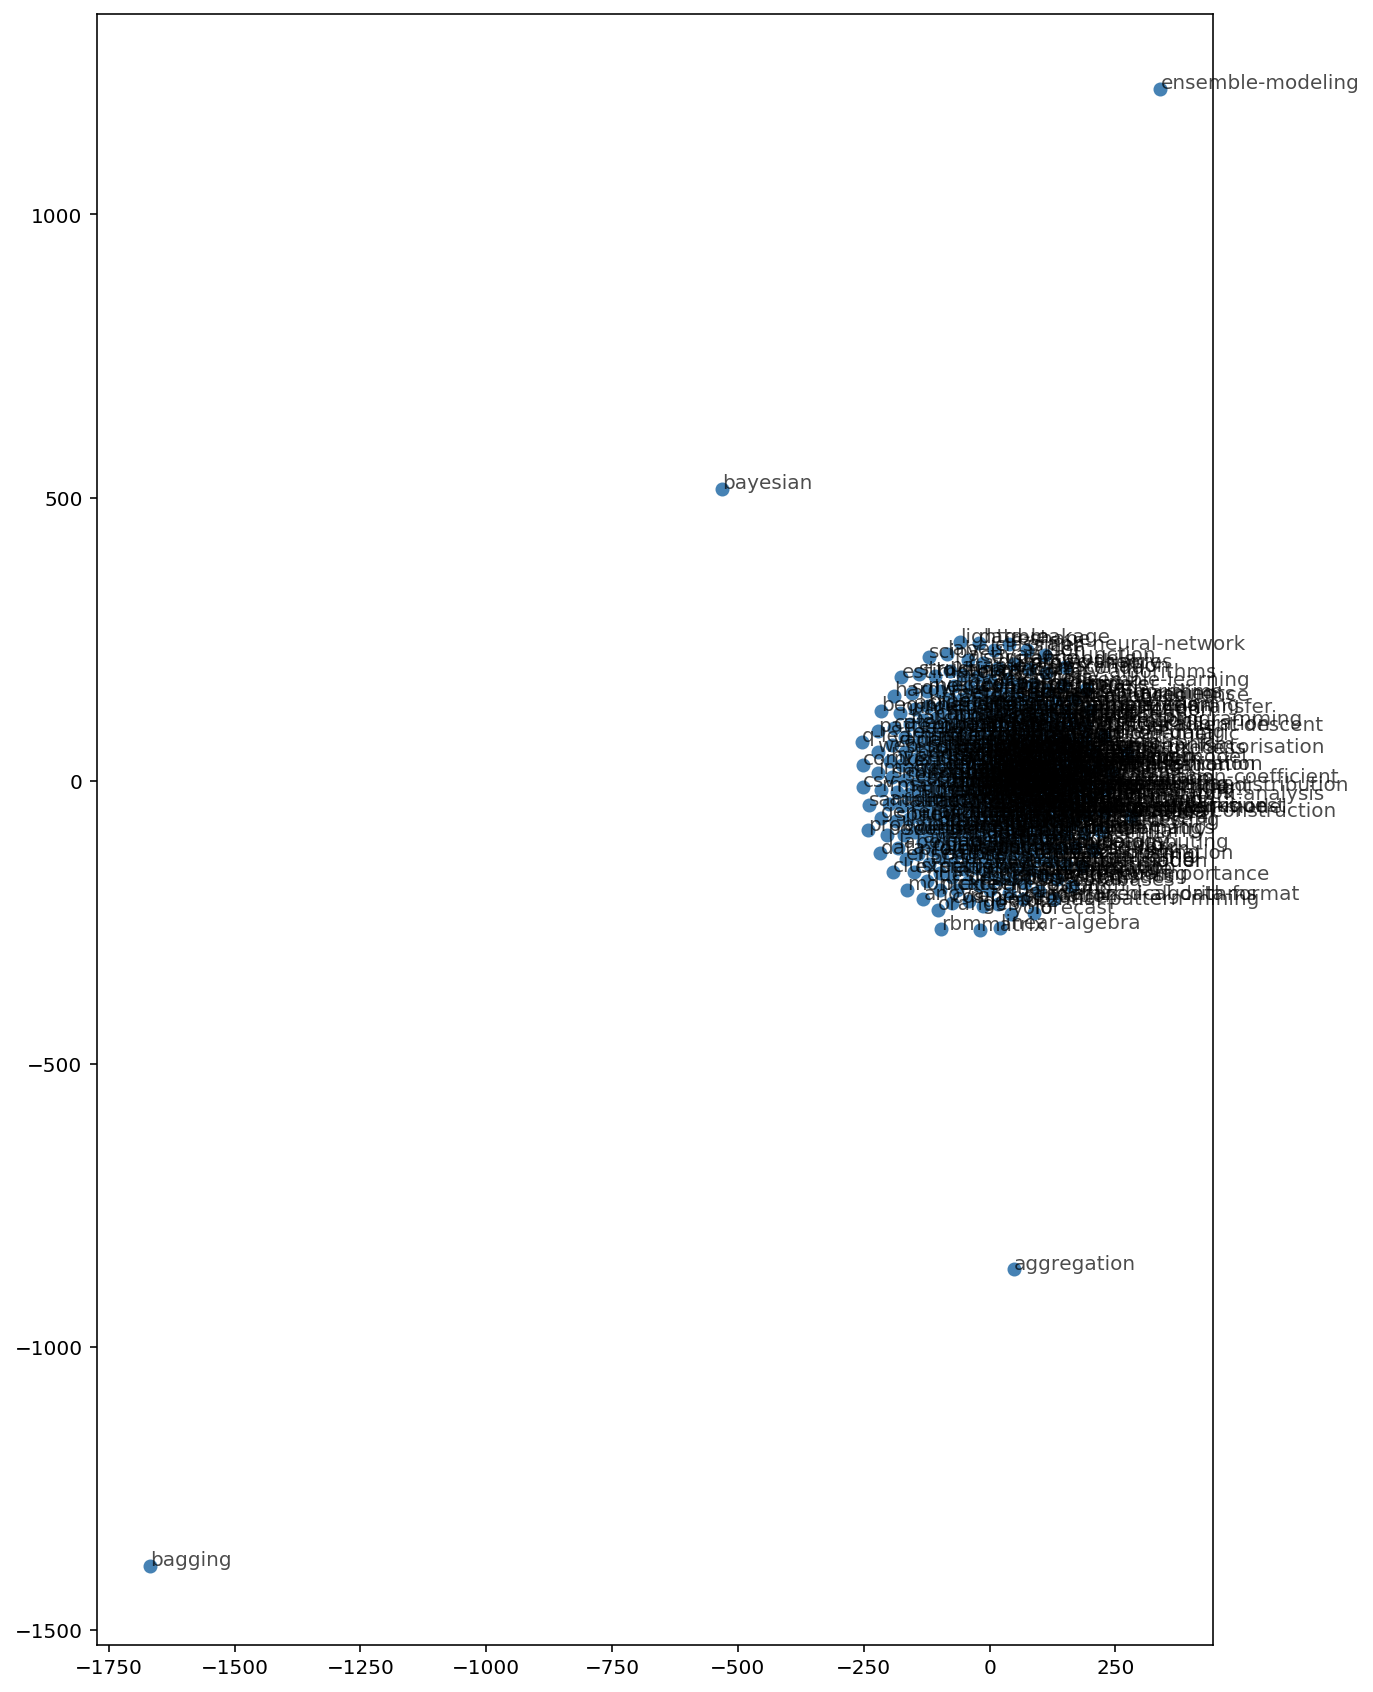

In [56]:
fig, ax = plt.subplots(figsize=(10, 15))
for idx in range(viz_words):
    plt.scatter(*embed_tsne[idx, :], color='steelblue')
    plt.annotate(int_to_vocab[idx], (embed_tsne[idx, 0], embed_tsne[idx, 1]), alpha=0.7)